# ICESat-2 and Reference Elevation Comparison

This notebook compares ICESat-2 elevations to snow-off reference elevations calculted from DTM_reference_elevations_calculation_sliderulecsv.m or DTM_reference_elevations_calculation.m

Last updated by Karina Zikan July 2022

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, Point
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Define Inputs

In [2]:
# File Paths
icesat2 = 'RCEW/RCEW-ICESat2-ATL06sr-atl08class.csv'
ref_elevations = 'RCEW/RCEW-ICESat2-ATL06sr-atl08class-ref-elevations.csv'
# Site
abbrev = 'RCEW'
site = 'RCEW/boundRCEW/boundRCEW_WGS84.geojson' #border file
# ICESat-2 acronym
acronym = 'ATL08'

## Load data

In [3]:
icesat2 = pd.read_csv(icesat2)
icesat2 = gpd.GeoDataFrame(icesat2)
ref_elev = pd.read_csv(ref_elevations)
ref_elev = gpd.GeoDataFrame(ref_elev)
region = gpd.read_file(site)

In [4]:
icesat2.geometry=gpd.points_from_xy(icesat2.Longitude, icesat2.Latitude)
ref_elev.geometry=gpd.points_from_xy(icesat2.Longitude, icesat2.Latitude)

### Check data arrays

In [12]:
icesat2.head()

,time,h_mean,segment_id,h_sigma,dh_fit_dy,n_fit_photons,rms_misfit,distance,pflags,rgt,...,dh_fit_dx,w_surface_window_final,cycle,spot,delta_time,geometry,Longitude,Latitude,Easting,Northing
0,2018-11-26 21:09:05.940407724,1334.337122,239687,0.216088,0.0,12,0.389217,4.806611e+06,0,905,...,-0.175885,4.526581,1,6,2.850175e+07,POINT (-116.69469 43.18609),-116.694691,43.186091,524810.037093,4.781525e+06
1,2018-11-26 21:09:06.007120300,1423.868211,239590,0.127058,0.0,14,0.455983,4.804667e+06,0,905,...,-0.260151,6.661973,1,5,2.850175e+07,POINT (-116.69146 43.16874),-116.691463,43.168739,525079.458744,4.779599e+06
2,2018-11-26 21:09:06.009937656,1419.190789,239591,0.092447,0.0,19,0.402960,4.804687e+06,0,905,...,-0.225228,5.775791,1,5,2.850175e+07,POINT (-116.69149 43.16892),-116.691486,43.168918,525077.461122,4.779619e+06
3,2018-11-26 21:09:06.012749052,1415.312079,239592,0.087934,0.0,14,0.327415,4.804707e+06,0,905,...,-0.105756,3.384974,1,5,2.850175e+07,POINT (-116.69151 43.16910),-116.691510,43.169098,525075.448380,4.779639e+06
4,2018-11-26 21:09:06.021148344,1410.601461,239595,0.073023,0.0,11,0.175884,4.804767e+06,0,905,...,-0.110525,3.000000,1,5,2.850175e+07,POINT (-116.69158 43.16964),-116.691582,43.169636,525069.366480,4.779699e+06


In [6]:
ref_elev.head()

,elevation_report_nw_mean,elevation_report_mean,elevation_report_fitted,elevation_report_std,geometry
0,0.000,0.000,NaN,0.000000,POINT (-116.69469 43.18609)
1,1424.714,1424.704,1424.425781,3.577164,POINT (-116.69146 43.16874)
2,1419.768,1419.699,1419.125000,2.293790,POINT (-116.69149 43.16892)
3,1416.857,1416.822,1416.722656,1.463617,POINT (-116.69151 43.16910)
4,1412.117,1412.144,1412.230469,1.582585,POINT (-116.69158 43.16964)


### Calculate Snow on and Snow off Elevation Differences

In [10]:
Residuals = icesat2['h_mean']-ref_elev['elevation_report_fitted']

In [14]:
ref_elev.Residuals = Residuals

/Users/karinazikan/opt/anaconda3/envs/sliderule/lib/python3.8/site-packages/geopandas/geodataframe.py:199: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super().__setattr__(attr, val)


0             NaN
1       -0.557570
2        0.065789
3       -1.410578
4       -1.629008
           ...   
72702    0.354609
72703    0.429448
72704    0.104651
72705    0.225535
72706    0.500905
Length: 72707, dtype: float64

## Map of elevations

<AxesSubplot:title={'center':'Fitted Reference Elevations'}, xlabel='Longitude', ylabel='Latitude'>

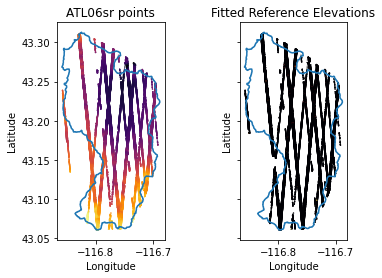

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title("ATL06sr points")
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_aspect('equal')
icesat2.plot(ax=ax1, column='h_mean', cmap='inferno', s=0.1)
region.plot(ax=ax1)

ax2.set_title("Fitted Reference Elevations")
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_aspect('equal')
ref_elev.plot(ax=ax2, column='elevation_report_fitted', cmap='inferno', s=0.1)
region.plot(ax=ax2)

## Map of Elevation differences

KeyError: 'Elevation'

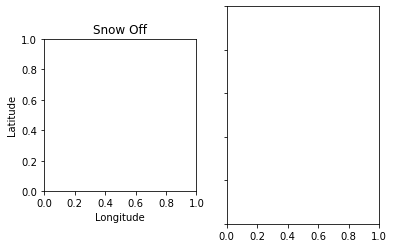

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title("Snow Off")
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_aspect('equal')
icesat2.plot(ax=ax1, column='Elevation', cmap='inferno', s=0.1)
region.plot(ax=ax1)

ax2.set_title("Snow On")
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_aspect('equal')
ref_elev.plot(ax=ax2, column='elevation_report_fitted', cmap='inferno', s=0.1)
region.plot(ax=ax2)